In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score

In [10]:
df=pd.read_csv(r"C:\Users\Mahesh\Downloads\Fish.csv")

In [11]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [12]:
# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())


  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64
            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.40

In [13]:
# Fill missing values (if any) with the mean of the respective column
df.fillna(df.mean(), inplace=True)


C:\Users\Mahesh\AppData\Local\Temp\ipykernel_21940\1750848574.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [19]:
# Define your features and target variable
X = df.drop(['Weight','Species'], axis=1)  # Features
y = df['Weight']  # Target variable

# Split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [23]:
mse

16763.88719314074

In [24]:
r2

0.8821430593048695

Explained Variance by each Principal Component: [0.8738777  0.10194308]
Total Variance Explained: 0.9758207825413928


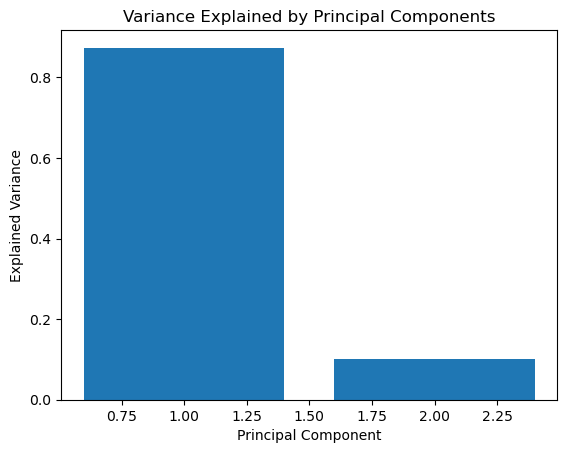

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature matrix

# Initialize PCA with the number of components you want to keep
n_components = 2  # You can choose the number of components you want to keep
pca = PCA(n_components=n_components)

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by each Principal Component:", explained_variance)

# Total variance explained
total_variance_explained = explained_variance.sum()
print("Total Variance Explained:", total_variance_explained)

# Visualize the variance explained by each component
plt.bar(range(1, n_components + 1), explained_variance)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.title("Variance Explained by Principal Components")
plt.show()
